In [ ]:
# For the dataset
from sklearn.datasets import fetch_20newsgroups
# For feature extraction (text to numbers)
from sklearn.feature_extraction.text import TfidfVectorizer
# The classifier model
from sklearn.naive_bayes import MultinomialNB
# A tool to chain steps together
from sklearn.pipeline import make_pipeline
# For evaluating the models performance
from sklearn import metrics
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train_data = fetch_20newsgroups(subset='train', shuffle=True, random_state=42)
test_data = fetch_20newsgroups(subset='test', shuffle=True, random_state=42)
print(f"{len(train_data.data)} documents in the training set.")
print(f"{len(test_data.data)} documents in the testing set.")
print(f"{len(train_data.target_names)} categories.")

11314 documents in the training set.
7532 documents in the testing set.
20 categories.


In [ ]:
# Create a pipeline that first creates TF-IDF features and then trains a Naive Bayes classifier.
model = make_pipeline(
    TfidfVectorizer(),
    MultinomialNB()
)

In [ ]:
# Train the model on the training data
print("Training the model...")
model.fit(train_data.data, train_data.target)
print("Training complete")

Training the model...
Training complete


Evaluating model performance:
Accuracy: 0.774

Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.80      0.52      0.63       319
           comp.graphics       0.81      0.65      0.72       389
 comp.os.ms-windows.misc       0.82      0.65      0.73       394
comp.sys.ibm.pc.hardware       0.67      0.78      0.72       392
   comp.sys.mac.hardware       0.86      0.77      0.81       385
          comp.windows.x       0.89      0.75      0.82       395
            misc.forsale       0.93      0.69      0.80       390
               rec.autos       0.85      0.92      0.88       396
         rec.motorcycles       0.94      0.93      0.93       398
      rec.sport.baseball       0.92      0.90      0.91       397
        rec.sport.hockey       0.89      0.97      0.93       399
               sci.crypt       0.59      0.97      0.74       396
         sci.electronics       0.84      0.60      0.70       393
     

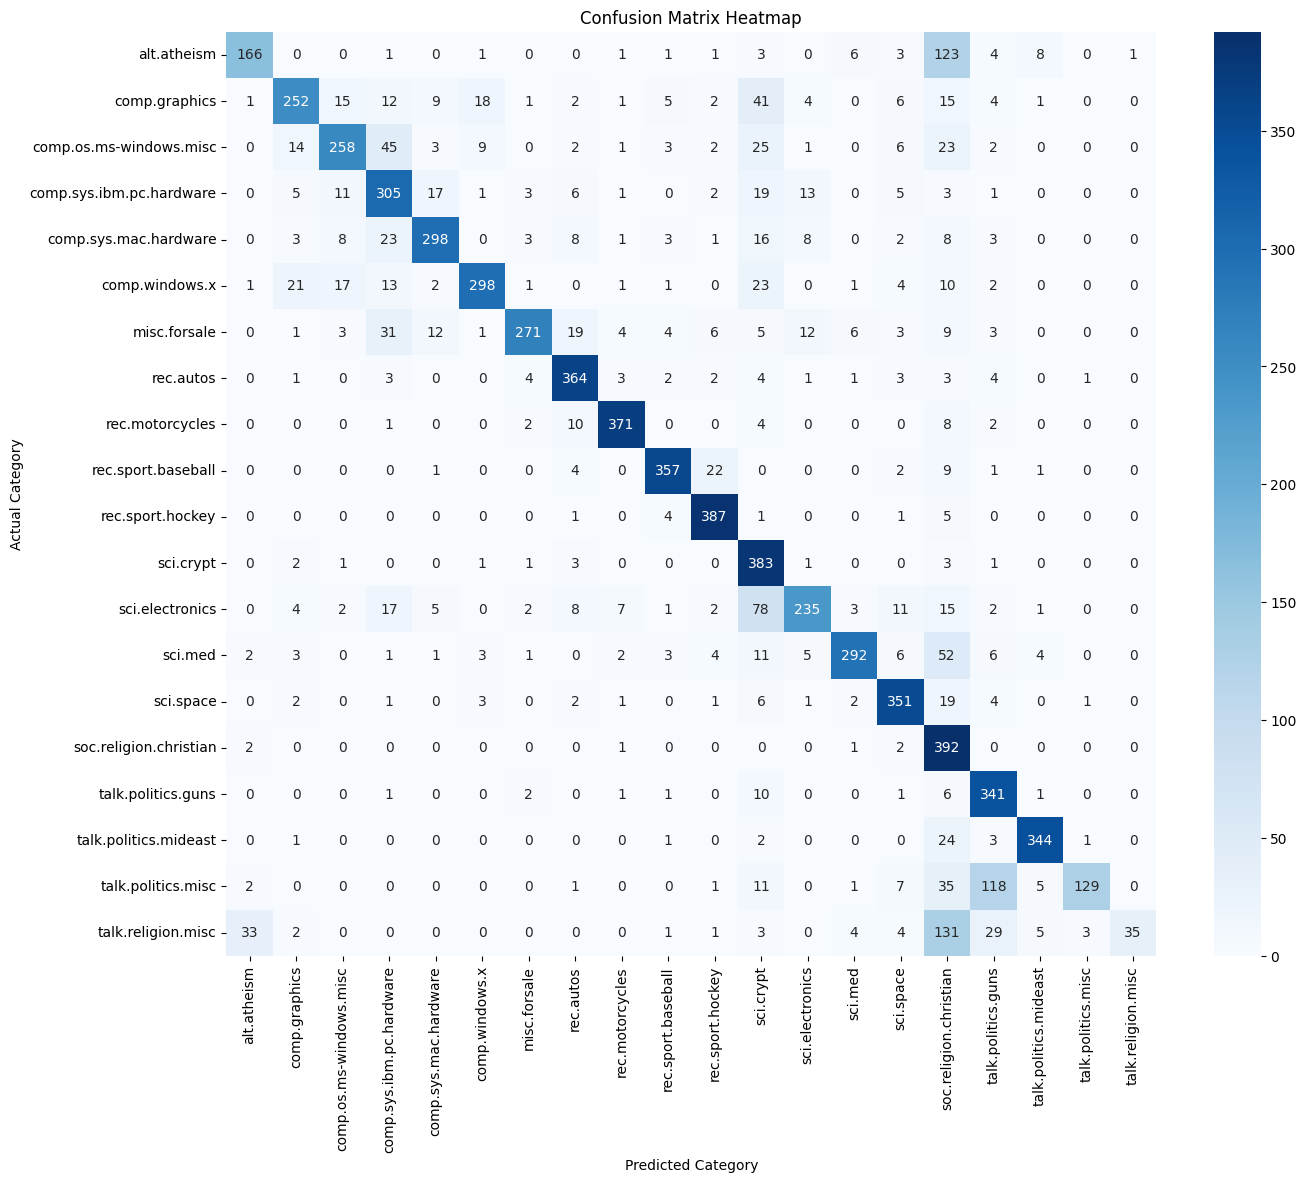

In [ ]:
# Make predictions on the test set
predicted_categories = model.predict(test_data.data)
# Performance metrics
print("Evaluating model performance:")
# Accuracy score = percentage of correct predictions
accuracy = metrics.accuracy_score(test_data.target, predicted_categories)
print(f"Accuracy: {accuracy:.3f}")
print("\nClassification Report:")
print(metrics.classification_report(test_data.target,
                                      predicted_categories,
                                      target_names=test_data.target_names))
# Confusion matrix heatmap
plt.figure(figsize=(15, 12))

sns.heatmap(conf_matrix,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=test_data.target_names,
            yticklabels=test_data.target_names)

plt.ylabel('Actual Category')
plt.xlabel('Predicted Category')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [ ]:
# Write a sentence to test the model
new_doc = ["There was another mass shooting in America"]
# Use the model to predict the category of the new sentence
predicted = model.predict(new_doc)
# Print the result
print(f"Sentence: '{new_doc[0]}'")
print(f"Predicted Category: {train_data.target_names[predicted[0]]}")

Sentence: 'There was another mass shooting in America'
Predicted Category: talk.politics.guns
